/home/daniil/repos/pytorch_fresh/pytorch/build/lib.linux-x86_64-2.7/torch/nn/functional.py:1761: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


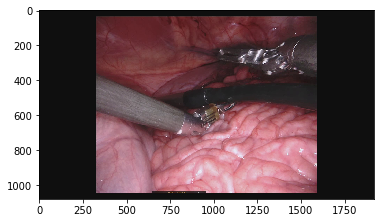

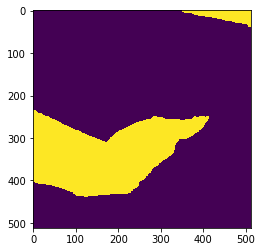

In [1]:
%matplotlib inline

import sys, os
sys.path.append("/home/daniil/repos/pytorch-segmentation-detection/")
sys.path.insert(0, '/home/daniil/repos/pytorch-segmentation-detection/vision/')
sys.path.append("/home/daniil/repos/pytorch_fresh/pytorch/build/lib.linux-x86_64-2.7")

# Use second GPU -pytorch-segmentation-detection- change if you want to use a first one
os.environ["CUDA_VISIBLE_DEVICES"] = '1'


from PIL import Image
from matplotlib import pyplot as plt

import torch
import torch.onnx
from torchvision import transforms
from torch.autograd import Variable
import pytorch_segmentation_detection.models.resnet_dilated as resnet_dilated

import numpy as np

img_path = '/home/daniil/datasets/data/instrument_dataset_1/left_frames/frame000.png'

valid_transform = transforms.Compose(
                [
                    transforms.CenterCrop((512, 512)),
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])

img_not_preprocessed = Image.open(img_path).convert('RGB')#.resize((512, 512))

img = valid_transform(img_not_preprocessed)

img = img.unsqueeze(0)

img = img.cuda()

fcn = resnet_dilated.Resnet18_8s(num_classes=2)
fcn.load_state_dict(torch.load('/home/daniil/models/endovis_2017/resnet_18_8s_best.pth'))
fcn.cuda()
fcn.eval()

res = fcn(img)

_, tmp = res.squeeze(0).max(0)
segmentation = tmp.data.cpu().numpy().squeeze()

plt.imshow(img_not_preprocessed)
plt.show()

plt.imshow(segmentation)
plt.show()

In [2]:
img.shape

torch.Size([1, 3, 512, 512])

In [7]:
torch.onnx.export(fcn, img, "resnet_18_8s_binary_512.onnx", verbose=True)

graph(%0 : Float(1, 3, 512, 512)
      %1 : Float(64, 3, 7, 7)
      %2 : Float(64)
      %3 : Float(64)
      %4 : Float(64)
      %5 : Float(64)
      %6 : Long()
      %7 : Float(64, 64, 3, 3)
      %8 : Float(64)
      %9 : Float(64)
      %10 : Float(64)
      %11 : Float(64)
      %12 : Long()
      %13 : Float(64, 64, 3, 3)
      %14 : Float(64)
      %15 : Float(64)
      %16 : Float(64)
      %17 : Float(64)
      %18 : Long()
      %19 : Float(64, 64, 3, 3)
      %20 : Float(64)
      %21 : Float(64)
      %22 : Float(64)
      %23 : Float(64)
      %24 : Long()
      %25 : Float(64, 64, 3, 3)
      %26 : Float(64)
      %27 : Float(64)
      %28 : Float(64)
      %29 : Float(64)
      %30 : Long()
      %31 : Float(128, 64, 3, 3)
      %32 : Float(128)
      %33 : Float(128)
      %34 : Float(128)
      %35 : Float(128)
      %36 : Long()
      %37 : Float(128, 128, 3, 3)
      %38 : Float(128)
      %39 : Float(128)
      %40 : Float(128)
      %41 : Float(128)
      %42 : 

In [8]:
ls

resnet_18_8s_binary_512.onnx      resnet_18_8s_binary_fullres.proto
resnet_18_8s_binary_fullres.onnx  Untitled.ipynb


In [6]:
import sys, os

sys.path.append("/home/daniil/repos/pytorch_fresh/pytorch/build/lib.linux-x86_64-2.7")

# Adding onnx compiled from sources
sys.path.append("/home/daniil/repos/pytorch_fresh/pytorch/third_party/onnx/build/lib.linux-x86_64-2.7/")

# Adding caffe2 compiled from sources
sys.path.append("/home/daniil/repos/pytorch_fresh/pytorch/build/")

import onnx

# Load the ONNX model
model = onnx.load("resnet_18_8s_binary_512.onnx")

# Check that the IR is well formed
onnx.checker.check_model(model)

# Print a human readable representation of the graph
print(onnx.helper.printable_graph(model.graph))

graph torch-jit-export (
  %0[FLOAT, 1x3x512x512]
) initializers (
  %1[FLOAT, 64x3x7x7]
  %2[FLOAT, 64]
  %3[FLOAT, 64]
  %4[FLOAT, 64]
  %5[FLOAT, 64]
  %6[INT64, scalar]
  %7[FLOAT, 64x64x3x3]
  %8[FLOAT, 64]
  %9[FLOAT, 64]
  %10[FLOAT, 64]
  %11[FLOAT, 64]
  %12[INT64, scalar]
  %13[FLOAT, 64x64x3x3]
  %14[FLOAT, 64]
  %15[FLOAT, 64]
  %16[FLOAT, 64]
  %17[FLOAT, 64]
  %18[INT64, scalar]
  %19[FLOAT, 64x64x3x3]
  %20[FLOAT, 64]
  %21[FLOAT, 64]
  %22[FLOAT, 64]
  %23[FLOAT, 64]
  %24[INT64, scalar]
  %25[FLOAT, 64x64x3x3]
  %26[FLOAT, 64]
  %27[FLOAT, 64]
  %28[FLOAT, 64]
  %29[FLOAT, 64]
  %30[INT64, scalar]
  %31[FLOAT, 128x64x3x3]
  %32[FLOAT, 128]
  %33[FLOAT, 128]
  %34[FLOAT, 128]
  %35[FLOAT, 128]
  %36[INT64, scalar]
  %37[FLOAT, 128x128x3x3]
  %38[FLOAT, 128]
  %39[FLOAT, 128]
  %40[FLOAT, 128]
  %41[FLOAT, 128]
  %42[INT64, scalar]
  %43[FLOAT, 128x64x1x1]
  %44[FLOAT, 128]
  %45[FLOAT, 128]
  %46[FLOAT, 128]
  %47[FLOAT, 128]
  %48[INT64, scalar]
  %49[FLOAT, 128x128x3x

In [7]:
import caffe2.python.onnx.backend as backend
import numpy as np

rep = backend.prepare(model, device="CUDA:0") # or "CPU"
# For the Caffe2 backend:
#     rep.predict_net is the Caffe2 protobuf for the network
#     rep.workspace is the Caffe2 workspace for the network
#       (see the class caffe2.python.onnx.backend.Workspace)
outputs = rep.run(np.random.randn(1, 3, 512, 512).astype(np.float32))
# To run networks with more than one input, pass a tuple
# rather than a single numpy ndarray.
print(outputs[0])

No handlers could be found for logger "caffe2.python.workspace"


[[[[ 0.31201977  0.31201977  0.31201977 ... -0.08047035 -0.08047035
    -0.08047035]
   [ 0.31201977  0.31201977  0.31201977 ... -0.08047035 -0.08047035
    -0.08047035]
   [ 0.31201977  0.31201977  0.31201977 ... -0.08047035 -0.08047035
    -0.08047035]
   ...
   [ 0.8341463   0.8341463   0.8341463  ... -0.00211788 -0.00211788
    -0.00211788]
   [ 0.8341463   0.8341463   0.8341463  ... -0.00211788 -0.00211788
    -0.00211788]
   [ 0.8341463   0.8341463   0.8341463  ... -0.00211788 -0.00211788
    -0.00211788]]

  [[-0.2728921  -0.2728921  -0.2728921  ... -0.15302955 -0.15302955
    -0.15302955]
   [-0.2728921  -0.2728921  -0.2728921  ... -0.15302955 -0.15302955
    -0.15302955]
   [-0.2728921  -0.2728921  -0.2728921  ... -0.15302955 -0.15302955
    -0.15302955]
   ...
   [-0.97262836 -0.97262836 -0.97262836 ... -0.17444637 -0.17444637
    -0.17444637]
   [-0.97262836 -0.97262836 -0.97262836 ... -0.17444637 -0.17444637
    -0.17444637]
   [-0.97262836 -0.97262836 -0.97262836 ... -0.17

In [9]:
def benchmark():

    outputs = rep.run(np.random.randn(1, 3, 512, 512).astype(np.float32))

In [11]:
%%timeit 
# 50ms on a 512 by 512 image

benchmark()

10 loops, best of 3: 59.8 ms per loop
